In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
zomato = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato.shape

(51717, 17)

In [4]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
#Checking the null values
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#Removing the null values
zomato.dropna(how = 'any', inplace = True)

In [8]:
zomato.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [9]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
#Dropping the columns which are not relevant
zomato=zomato.drop(['url','dish_liked','phone'],axis=1)

In [11]:
#Upadating few columns 
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [12]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [13]:
#Checking for duplicate values
zomato.duplicated().sum()

11

In [14]:
#Dropping the duplicate values
zomato.drop_duplicates(inplace = True)

In [15]:
zomato.shape

(23182, 14)

In [16]:
#Simplifying the ratings column
#Removing '/5' from Rates
zomato['rate'].unique()
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

In [17]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

The highest rating to restaurants is 4.1 and the least rating to restaurants is 1.8.

### Number of Restaurants in Area

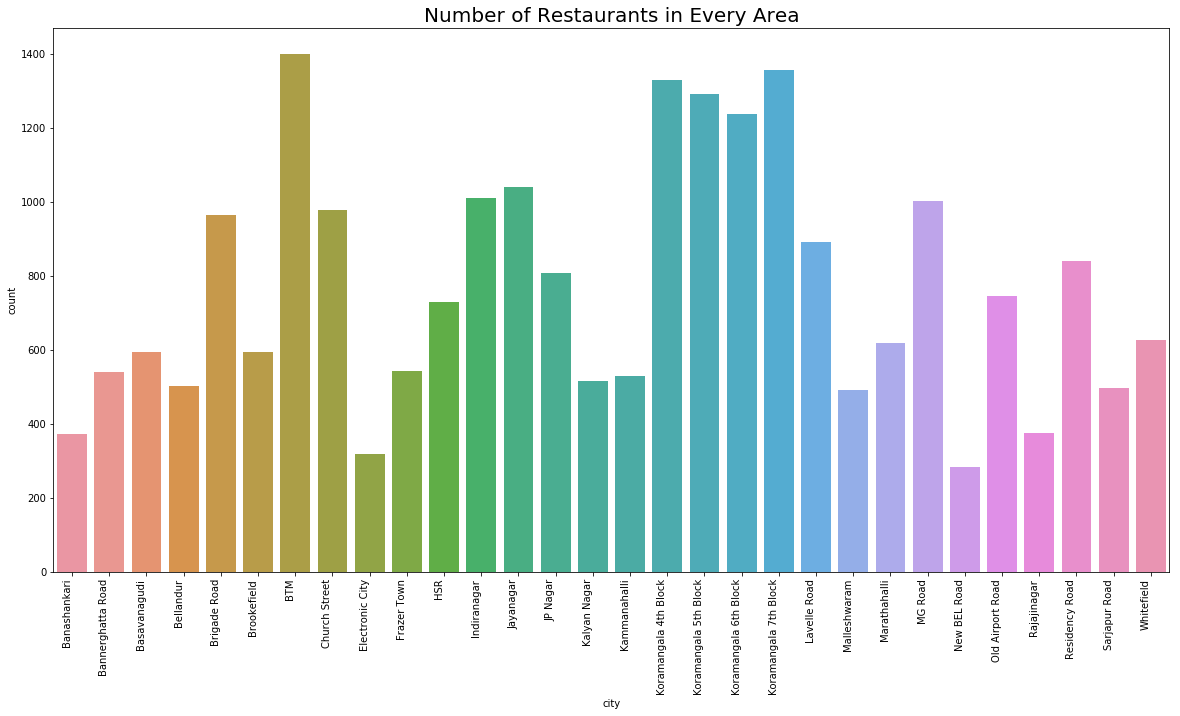

In [18]:
rcParams['figure.figsize'] = (20,10)
sb.countplot(zomato['city'])
sb.countplot(zomato['city']).set_xticklabels(sb.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
plt.title('Number of Restaurants in Every Area', size = 20)
plt.show()

### Restaurants taking Online Orders or Not

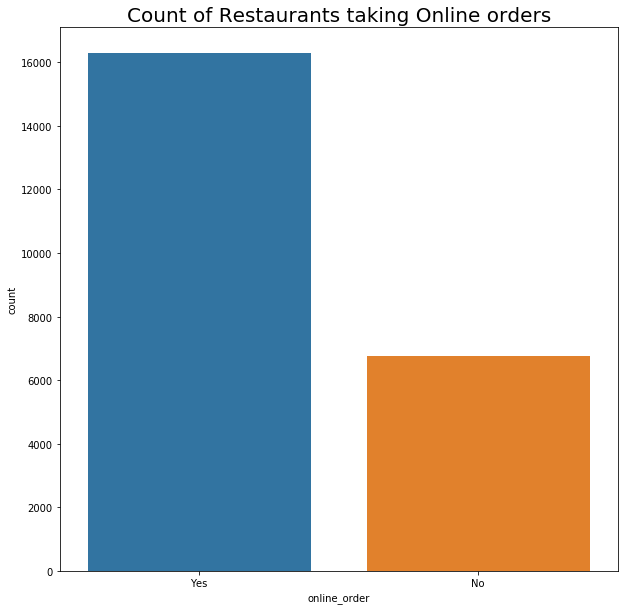

In [19]:
rcParams['figure.figsize'] = (10,10)
sb.countplot(zomato['online_order'])
plt.title('Count of Restaurants taking Online orders', size = 20)
plt.show()

### Restaurants allowing Table Booking

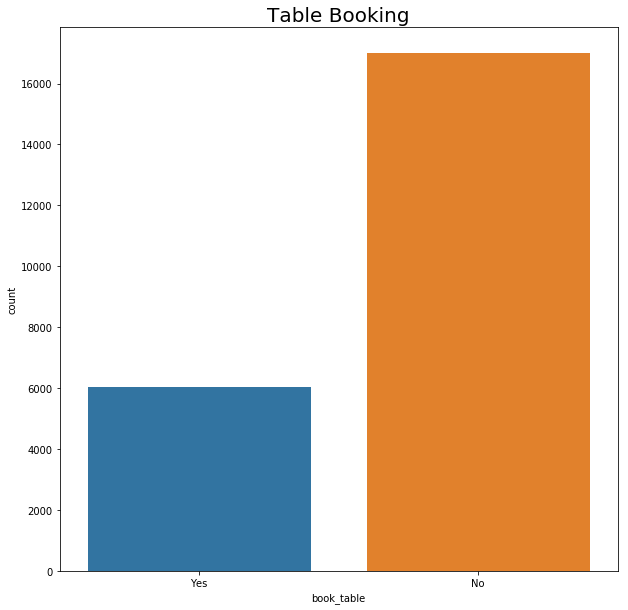

In [20]:
rcParams['figure.figsize'] = (10,10)
sb.countplot(zomato['book_table'])
plt.title('Table Booking', size = 20)
plt.show()

### Restaurant Type

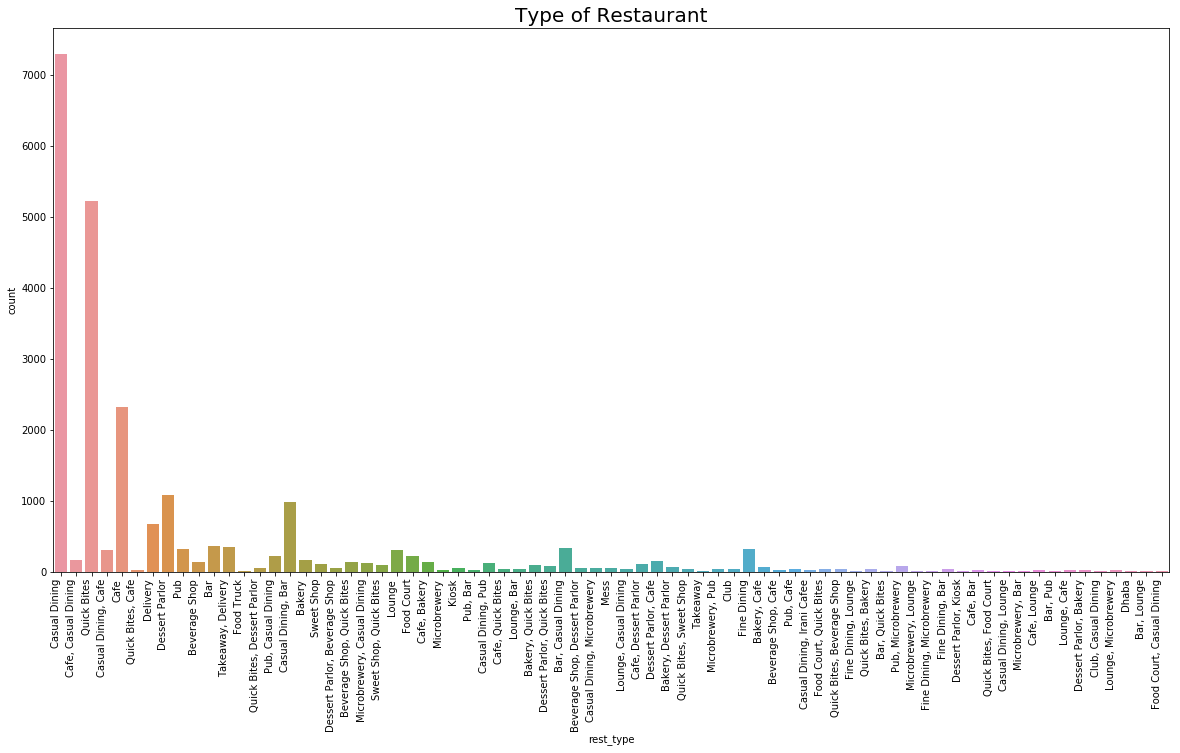

In [21]:
rcParams['figure.figsize'] = (20,10)
sb.countplot(zomato['rest_type'])
sb.countplot(zomato['rest_type']).set_xticklabels(sb.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
plt.title('Type of Restaurant', size = 20)
plt.show()

### Type of Service

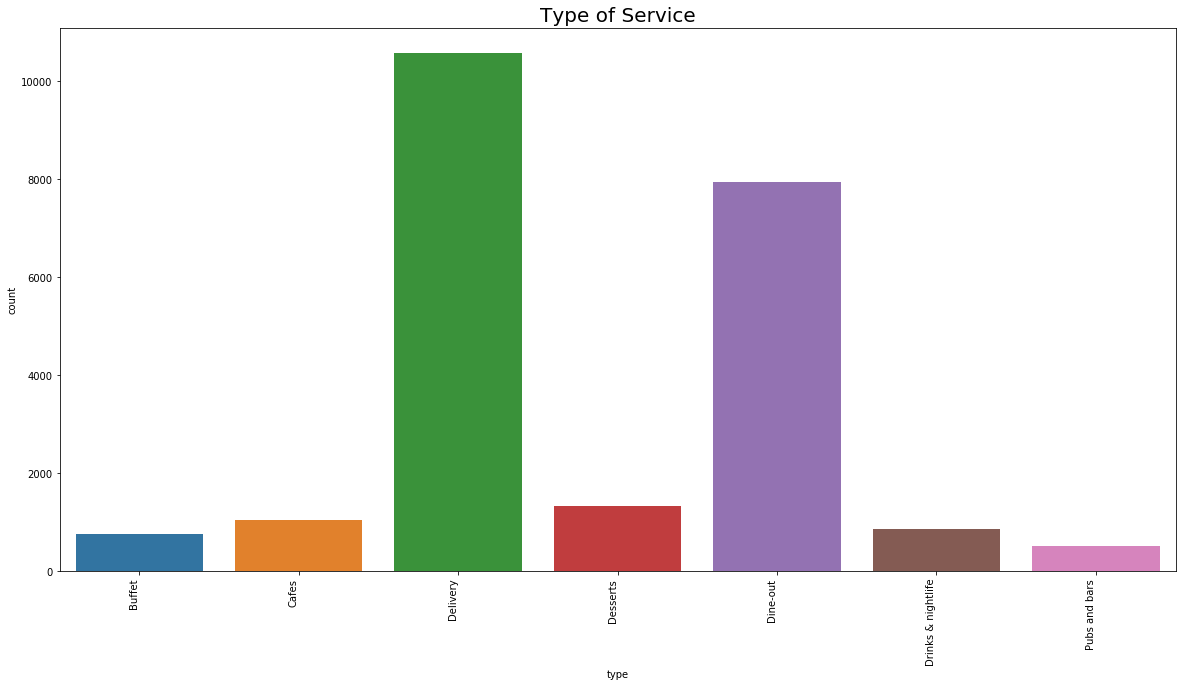

In [22]:
rcParams['figure.figsize'] = (20,10)
sb.countplot(zomato['type'])
sb.countplot(zomato['type']).set_xticklabels(sb.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
plt.title('Type of Service', size = 20)
plt.show()

### Cost

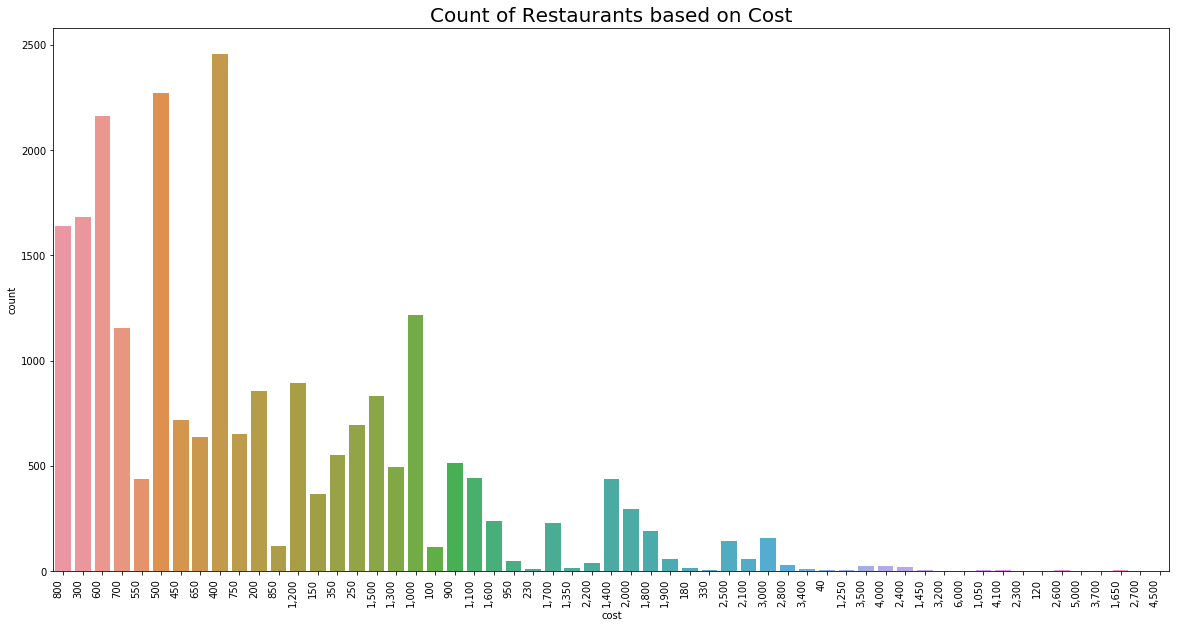

In [23]:
rcParams['figure.figsize'] = (20,10)
sb.countplot(zomato['cost'])
sb.countplot(zomato['cost']).set_xticklabels(sb.countplot(zomato['cost']).get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Restaurants based on Cost', size = 20)
plt.show()

### Number of Restaurants in Every Location

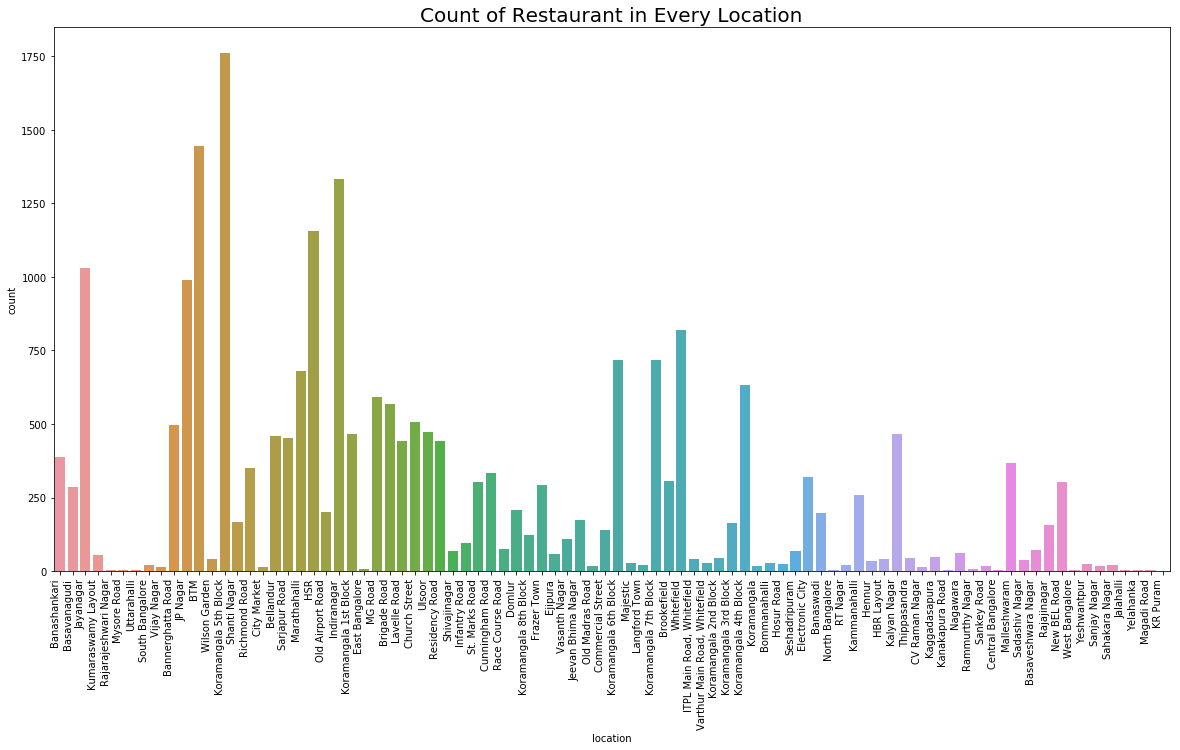

In [24]:
rcParams['figure.figsize'] = (20,10)
sb.countplot(zomato['location'])
sb.countplot(zomato['location']).set_xticklabels(sb.countplot(zomato['location']).get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Restaurant in Every Location', size = 20)
plt.show()

### Top Restaurants in Bengaluru

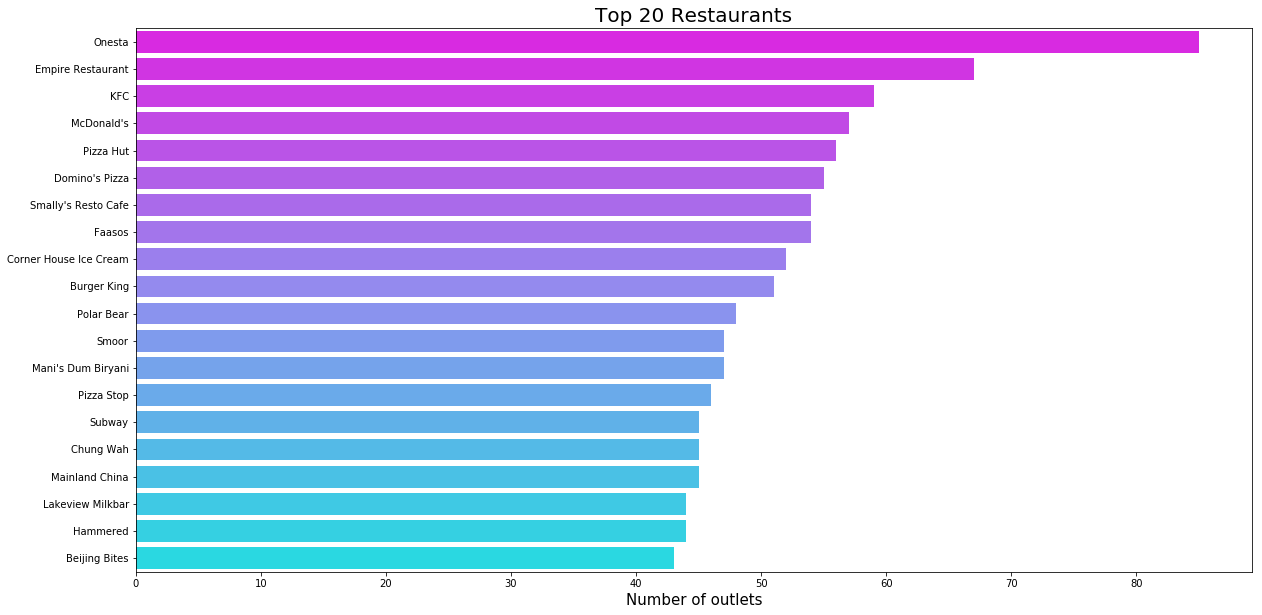

In [25]:
rcParams['figure.figsize'] = (20,10)
top = zomato['name'].value_counts()[:20]
sb.barplot(x = top, y = top.index, palette = 'cool_r')
plt.xlabel("Number of outlets",size=15)
plt.title('Top 20 Restaurants', size = 20)
plt.show()

# Regression Analysis

In [26]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Some Transformations for Modelling

In [27]:
#Cost Transformations
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)

In [28]:
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 750.  , 200.  , 850.  ,   1.2 , 150.  , 350.  , 250.  ,
         1.5 ,   1.3 ,   1.  , 100.  , 900.  ,   1.1 ,   1.6 , 950.  ,
       230.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,   1.8 ,   1.9 ,
       180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,
         1.25,   3.5 ,   4.  ,   2.4 ,   1.45,   3.2 ,   6.  ,   1.05,
         4.1 ,   2.3 , 120.  ,   2.6 ,   5.  ,   3.7 ,   1.65,   2.7 ,
         4.5 ])

In [29]:
#Other Transformations
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

### Encoding

In [30]:
#Encoding of input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

### Correlation Heatmap

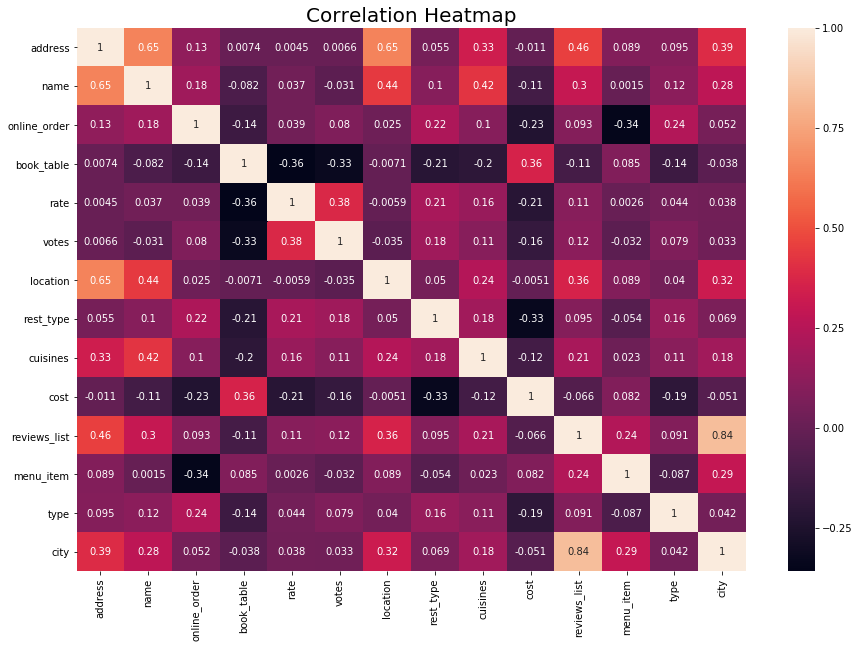

In [31]:
rcParams['figure.figsize'] = (15,10)
sb.heatmap(zomato_en.corr(), annot=True)
plt.title('Correlation Heatmap', size = 20)
plt.show()

### Modelling

In [32]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']

### Splitting dataset for Training & Testing

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

### Random Forest Regression

In [34]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(n_estimators=500)
random.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [35]:
print(" Accuracy :{}" .format(random.score(x_test, y_test)))

 Accuracy :0.9145041638197294


# Sentiment Analysis

In [36]:
# Importing Intensity Analyser to check the intensity status of the given review
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [37]:
# Selecting 5 sample reviews to analyse the intensity
restaurant_rev = zomato['reviews_list'].value_counts()
restaurant_rev.sample(5)

[('Rated 5.0', 'RATED\n  The greatest thing about this place is you will get gaming parlour, bar and good food under one roof only. this bar stock exchange is just associated with Smaash at 1Mg mall. U may have a little difficulty to find this place. \nComing to the drinks , we have tried LIIT and Margarita Cocktail which was  quiet good.\nAmong the foods my recommendations are:\n*Lababdar Chicken Wings\n*Chicken Koliwada popcorn\n*Lasooni Saag with Lachha Paratha\n*Potli biriyani : must must try!\n\nOverall a nice visit.'), ('Rated 3.0', 'RATED\n  Finding the place was nothing short of a treasure hunt.\nAmbience is close to that of any regular american diner.. the food menu is very limited but the bar menu is exquisite and is fully stocked and easy to order through the exchange app.\nThe prices are very pocket friendly.\nThe broccoli pops were indeed good.\nOur table staff - oinam was extremely welcoming and polite !'), ('Rated 4.0', "RATED\n  Nice concept of stock exchange where you 

In [38]:
# Picking random reviews from the samples to analyse
# fitting the review as sentence for analysis
rev = ["Best place to take your family or the one you have a comfortable relationship with. A no-frills place serving good quality but not extraordinary food.",
      "Awesome place with good ambience and service food was superb , rabbidi was finger licking... A must try ",
      "Visited this place for lunch.. we opted ala carte.. let me remind you the place is quite expensive for the amount it serves. We ordered 2 naan, one malai kofta, 2 shikanji and the bill was 1250 bucks.",
      "I really did not like it.. it is far from fine dining.. it will just burn a hole in your pocket for no reason.",
      "I love the food, but when it comes cleanliness it is zero. Take away is good. But being a budget friendly place, i love it. I am not saying the food is amazing , but yeah it is good. They definitely need a revamp."]

In [39]:
sid = SentimentIntensityAnalyzer()
for sentence in rev:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in ss:
        print('{0}: {1}, '.format(k, ss[k]), end = '\n')
    print()

Best place to take your family or the one you have a comfortable relationship with. A no-frills place serving good quality but not extraordinary food.
neg: 0.0, 
neu: 0.749, 
pos: 0.251, 
compound: 0.6908, 

Awesome place with good ambience and service food was superb , rabbidi was finger licking... A must try 
neg: 0.0, 
neu: 0.539, 
pos: 0.461, 
compound: 0.9022, 

Visited this place for lunch.. we opted ala carte.. let me remind you the place is quite expensive for the amount it serves. We ordered 2 naan, one malai kofta, 2 shikanji and the bill was 1250 bucks.
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.0, 

I really did not like it.. it is far from fine dining.. it will just burn a hole in your pocket for no reason.
neg: 0.18, 
neu: 0.749, 
pos: 0.071, 
compound: -0.4164, 

I love the food, but when it comes cleanliness it is zero. Take away is good. But being a budget friendly place, i love it. I am not saying the food is amazing , but yeah it is good. They definitely need a rev